In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [4]:
final_file = pd.read_csv(*Cleaned Datased input*)

In [5]:
sentiment_map = pd.read_csv(*sentiment input(saved in KMeans code*))
sentiment_dict = dict(zip(sentiment_map.words.values, sentiment_map.sentiment_coeff.values))

In [10]:
df_final = final_file.copy()
df_final.dropna()

,Unnamed: 0,tweets
0,0,undoubtedli bb season 13reason histor winner b...
1,1,raja
2,2,cours doubt kingrahul
3,3,yess king heart rahul vaidya
4,4,bbtrendmasterrahulvaidya show strength
...,...,...
32547,32547,boss ladi rubina
32548,32548,jasminebhasin inferior complex alway jealou gi...
32549,32549,prove real queen bigg boss jasmin rule bb14
32550,32550,word start lose valu action dont match boss la...


In [14]:
tfidf = TfidfVectorizer(tokenizer=lambda y: y.split(), norm=None)
tfidf.fit(df_final['tweets'].values.astype('U'))
features = pd.Series(tfidf.get_feature_names())
transformed = tfidf.transform(df_final['tweets'].values.astype('U'))

In [19]:
def create_tfidf_dictionary(x, transformed_file, features):    
    #create dictionary for each input sentence x, where each word has assigned its tfidf score
    
    vector_coo = transformed_file[x.name].tocoo()
    vector_coo.col = features.iloc[vector_coo.col].values
    dict_from_coo = dict(zip(vector_coo.col, vector_coo.data))
    return dict_from_coo

def replace_tfidf_words(x, transformed_file, features):
    #replacing each word with it's calculated tfidf dictionary with scores of each word

    dictionary = create_tfidf_dictionary(x, transformed_file, features)   
    return list(map(lambda y:dictionary[f'{y}'], str(x.tweets).split()))

In [20]:
replaced_tfidf_scores = df_final.apply(lambda x: replace_tfidf_words(x, transformed, features), axis=1)

In [21]:
def replace_sentiment_words(word, sentiment_dict):
    #replacing each word with its associated sentiment score from sentiment dict
    
    try:
        out = sentiment_dict[word]
    except KeyError:
        out = 0
    return out

In [32]:
replaced_closeness_scores = df_final.tweets.apply(lambda x: list(map(lambda y: replace_sentiment_words(y, sentiment_dict), str(x).split())))
replaced_closeness_scores.head()

0    [-1.1539765493240988, 0.0, 0.0, 0, 0, -1.07663...
1                                [-1.0926401579243967]
2         [1.2068010337319697, -1.1461039365586645, 0]
3    [-1.5162292346553177, -1.098142254527192, 0.0,...
4                      [-1.1724065056680022, 0.0, 0.0]
Name: tweets, dtype: object

In [27]:
predictions_df = pd.DataFrame(data=[replaced_closeness_scores, replaced_tfidf_scores, df_final.tweets]).T
predictions_df.columns = ['sentiment_coeff', 'tfidf_scores', 'sentence']
predictions_df['sentiment_rate'] = predictions_df.apply(lambda x: np.array(x.loc['sentiment_coeff']) @ np.array(x.loc['tfidf_scores']), axis=1)


In [36]:

EE code daggaraku vachinappudu call cheyyi hehe

for i in range(0,len(predictions_df.index)):
    if predictions_df.loc[i,'sentiment_rate']>20.688483:
        predictions_df.loc[i,'prediction']=2
    elif predictions_df.loc[i,'sentiment_rate']<-33.018816:
        predictions_df.loc[i,'prediction']=0
    else:
        predictions_df.loc[i,'prediction']=1
        
        
*relacement_df is the output*

,sentiment_coeff,tfidf_scores,sentence,sentiment_rate,prediction
0,"[-1.1539765493240988, 0.0, 0.0, 0, 0, -1.07663...","[8.618036087048537, 4.3241578391513595, 4.7416...",undoubtedli bb season 13reason histor winner b...,-39.933348,0
1,[-1.0926401579243967],[7.142129567238959],raja,-7.803778,0
2,"[1.2068010337319697, -1.1461039365586645, 0]","[7.127944932247002, 6.890815138958052, 10.6974...",cours doubt kingrahul,0.704421,1
3,"[-1.5162292346553177, -1.098142254527192, 0.0,...","[7.059891469001986, 5.369601459938791, 5.38181...",yess king heart rahul vaidya,-20.335376,0
4,"[-1.1724065056680022, 0.0, 0.0]","[4.547941527049895, 3.545208772695833, 7.34757...",bbtrendmasterrahulvaidya show strength,-5.332036,0


,words,sentiment_coeff
0,biggboss_goat,-1.485961
1,winner,-1.076640
2,time,0.000000
3,sidharthshukla,-1.172626
4,raja,-1.092640


count    8155.000000
mean       48.971505
std        71.375851
min         0.009558
25%         7.268455
50%        18.635317
75%        61.652287
max       695.037627
Name: sentiment_rate, dtype: float64

KeyError: 32552

,sentiment_coeff,tfidf_scores,sentence,sentiment_rate,prediction
32547,"[-1.1143030744101747, 0.0, 0.0]","[2.1747000590182344, 2.8555916997437487, 2.489...",boss ladi rubina,-2.423275,1.0
32548,"[0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[6.717795974826411, 9.193400231952097, 14.6261...",jasminebhasin inferior complex alway jealou gi...,-31.601587,0.0
32549,"[0.0, -1.055745356253286, -1.0843687752493414,...","[6.309220444303854, 4.98209601822882, 5.270327...",prove real queen bigg boss jasmin rule bb14,-13.398078,1.0
32550,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.1143030...","[5.474422746680882, 5.1272265466966935, 7.1421...",word start lose valu action dont match boss la...,-2.423275,1.0
32551,"[0.0, 0, 0.0, -1.1143030744101747, 0.0, 0.0]","[8.75156747967306, 10.292012520620208, 8.44618...",comparison thief joy boss ladi rubina,-2.423275,1.0


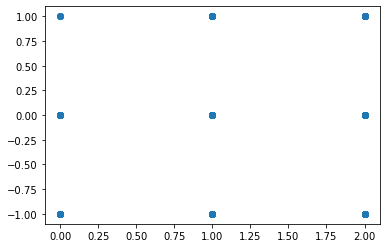

1.0    23077
0.0     7042
2.0     2433
Name: 2, dtype: int64

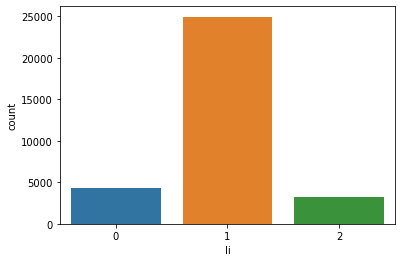

,li,2
0,0,0.0
1,0,1.0
2,1,1.0
3,0,0.0
4,1,1.0


7614
